### PROGRAMMING EXERCISES
(a) Generate a synthetic dataset with the following data generating process:

$$
Y \sim \alpha+\beta X+\epsilon,
$$

where $X$ is drawn from a normal distribution with mean 168 and standard deviation 30 , and $\epsilon$ is drawn from a normal distribution with mean 0 and standard deviation 20.

[Hint: use function 'numpy.random.normal', and X and Y should be a column vector. Think carefully what the shape of $\mathrm{X}$ and epsilon should be when generating their values.]

(b) Run 5 linear regressions with sample sizes $n=10^{2}, 10^{3}, 10^{4}, 10^{5}, 10^{6}$, respectively. Report the coefficients and $R^{2}$ of each run.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
alpha = 20
beta = 0.5
sizes = [10**2, 10**3, 10**4, 10**5, 10**6]
alpha_pred =[]
beta_pred = []


for n in sizes:
    list_x = []
    list_y = []
    for a in range(n):
        x = np.random.normal(168,30)
        epsilon = np.random.normal(0,20)
        y = alpha + beta * x + epsilon
        list_x.append(x)
        list_y.append(y)

    x_array = np.array(list_x).reshape(-1,1)
    y_array = np.array(list_y).reshape(-1,1)
    
    model = LinearRegression()
    model.fit(x_array, y_array)
    coef = model.coef_
    intercept = model.intercept_
    alpha_pred.append(intercept)
    beta_pred.append(coef[0][0])
    r2 = model.score(x_array, y_array)
    print(f"When the size is {n}:")
    print(f"The R2_score is {r2}")
    print(f"The beta predict is {coef}")
    print(f"The alpha predict is {intercept}")




When the size is 100:
The R2_score is 0.3458026439555887
The beta predict is [[0.44009551]]
The alpha predict is [30.0111284]
When the size is 1000:
The R2_score is 0.34047741688732613
The beta predict is [[0.49074264]]
The alpha predict is [20.91794416]
When the size is 10000:
The R2_score is 0.36288921352403647
The beta predict is [[0.50548421]]
The alpha predict is [18.973738]
When the size is 100000:
The R2_score is 0.36106902551464704
The beta predict is [[0.50131395]]
The alpha predict is [19.7899237]
When the size is 1000000:
The R2_score is 0.3608637465528789
The beta predict is [[0.5010381]]
The alpha predict is [19.84733172]


(c) What do you observe in part (b)? Do the coefficients of your linear regressions converge to the $\alpha$ and $\beta$ ? Does your $R^{2}$ converge to 0 ? If not, what number does it converge to?


In part(b), I observed that:
   1. With the increase of size, the coefficients gradually approached the alpha and beta.
   2. R2 converged to 0.36 with the increase of size.






(d) Recall that the analytical form of $R^{2}$ is given by

$$
R^{2}=1-\frac{\sum_{i=1}^{n}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}}{\sum_{i=1}^{n}\left(y^{(i)}-\bar{y}\right)^{2}},
$$

where $\bar{y}=\sum_{i=1}^{n} \frac{1}{n} y^{(i)}$ is the empirical mean of the labels. Recall that the sample variance of a random variable $X$ is calculated by $\operatorname{var}(X)=\frac{1}{n} \sum_{i=1}^{n}\left(x^{(i)}-\bar{x}\right)^{2}$, where $\bar{x}$ is the sample mean. Assuming that the coefficient of the linear regression converges to those in true data generating distribution, establish that when the data generation is linear, $R^{2}$ of a linear regression converge to $1-\frac{\operatorname{var}(\epsilon)}{\operatorname{var}(Y)}$.

Answer:
$$ \sum_{i=1}^{n}\left(y^{\left(i\right)}-\hat{y}^{\left(i\right)}\right)^2=\sum_{i=1}^{n}{(f(x^{(i)})+\epsilon^{(i)}-\hat{f}(x^{(i)}))}^2 $$
Since the coefficient of the linear regression converges to those in true data generating distribution, we can get that:
$$ f(x^{(i)})=\hat{f}(x^{(i)}) $$
$$ \sum_{i=1}^{n}\left(y^{\left(i\right)}-\hat{y}^{\left(i\right)}\right)^2=n\times Var(\epsilon) $$
$$ Var(Y)= \beta^2 \cdot Var(X) + Var(\epsilon)$$
$$ \sum_{i=1}^{n}\left(y^{\left(i\right)}-\bar{y}\right)^2=n\times Var(Y)$$
$$ R^2 = 1-\frac{\sum_{i=1}^{n}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}}{\sum_{i=1}^{n}\left(y^{(i)}-\bar{y}\right)^{2}} = 1-\frac{\operatorname{var}(\epsilon)}{\operatorname{var}(Y)} $$
$$ R^2 = 1-\frac{\operatorname{var}(\epsilon)}{\operatorname{var}(Y)} = 0.36 $$
That is why $R^2$ will converge to 0.36.

(e) [Bonus point +2 ] Show that the coefficients of the linear regression converges to $\alpha$ and $\beta$ in the data generating process.

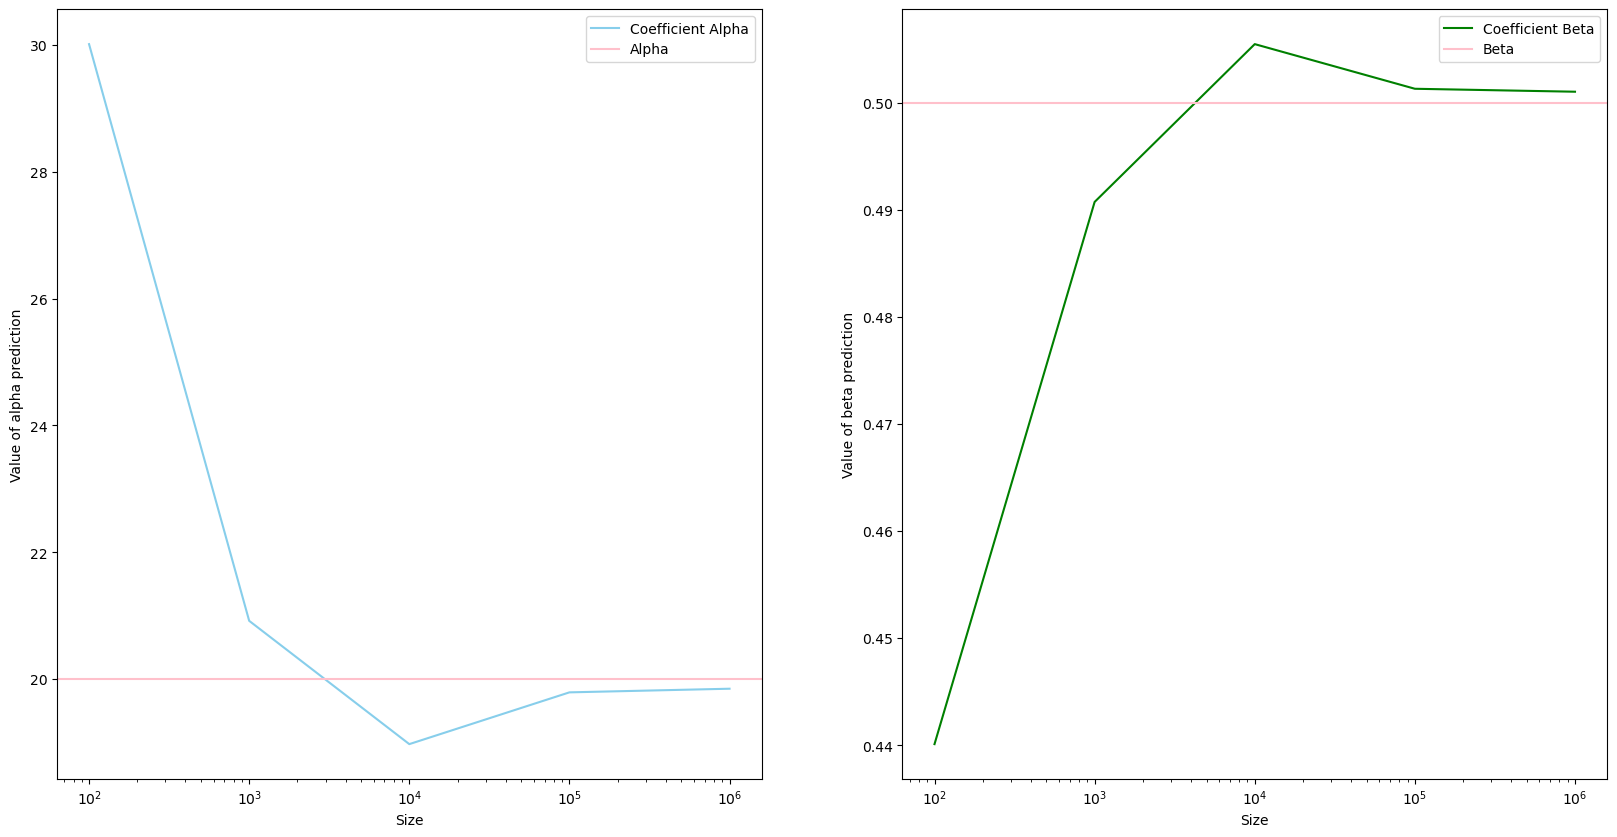

In [2]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(sizes,alpha_pred,color = 'skyblue', label= 'Coefficient Alpha')
plt.axhline(y=alpha, color = 'pink', label = 'Alpha')
plt.xscale('log')
plt.xlabel("Size")
plt.ylabel("Value of alpha prediction")
plt.legend()
plt.subplot(122)
plt.plot(sizes,beta_pred,color = 'green', label= 'Coefficient Beta')
plt.axhline(y=beta, color = 'pink', label = 'Beta')
plt.xscale('log')
plt.xlabel("Size")
plt.ylabel("Value of beta prediction")
plt.legend()


Based in the pic, we can see that the coefficients will converges to $ a $ and $ b $ in the data generating process.

(f) In the example above, you have established that if 1) the data generating process is linear and 2) we fit the data using linear regression, then the $R^{2}$ converges to $1-\frac{\operatorname{var}(\epsilon)}{\operatorname{var}(Y)}$. Given this information, do you think there exists another model such that you obtain a better (higher) $R^{2}$ asymptotically (when the data that you get goes to infinity)? If so, show such an example. If not, please argue why. (You do not need to show this mathematically.)

The parameter $Y$ is generated through the linear model. Consequently, if the data we obtained goes to infinity, the $Var(Y)$ will infinitely approximate to its theoretical value:
$$ Var(Y)= \beta^2 \cdot Var(X) + Var(\epsilon) = 225 + 400 = 625$$
In such occasion, no other model will have a better performance than the linear regression. Because it reveals the true connections between the x and y even under the influence of noise. And other model will never have such a good performance and will introduce more bias in the model and reduce the $R^2$. 

(g) Based on this exercise, what are some important characteristics of the data generating distribution necessary for the presence of a "good" model?

1. The random variables should be independent with each other and be normal distributed. In such occasion, we can fulfill the LLD assumption of Linear Regression.

2. The distribution generating pattern should be the same with the model. For example, if we want to achieve a good model performance, we will expect to use a linear regression model to predict a linear function. And use a polynomial model to predict polynomial functions to reach the optimal performance and discover the true relations between variables.

3. The noise in the data should be as minimal as possible, so that the model could predict a larger part of vars, which increase the $R^2$ of the model.